## Data Inconsistency

In [ ]:
!pip install --upgrade fuzzywuzzy

In [ ]:
!pip install --upgrade python-Levenshtein

In [3]:
import pandas as pd
import fuzzywuzzy as fw
from fuzzywuzzy import process
import chardet
from datetime import datetime

In [4]:
# Tests to see if we are running in the Google Colaboratory environment
# If so, use an https URL to access the data.  Otherwise, load via the file path
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/DataScienceNotebooks/master/DataCleaning/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""

# Read in CSV File
First, attempt using UTF-8 (which is the standard format)

In [5]:
suicide_attacks = pd.read_csv(data_file_prefix + "data/PakistanSuicideAttacks.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 0: invalid start byte

Now, check to see what the file encoding is ....

In [6]:
with open(data_file_prefix +"data/PakistanSuicideAttacks.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [7]:
suicide_attacks = pd.read_csv(data_file_prefix +"data/PakistanSuicideAttacks.csv", encoding='Windows-1252')

Start exploring the data:

In [8]:
suicide_attacks.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [9]:
suicide_attacks.shape

(496, 26)

In [10]:
suicide_attacks.dtypes

S#                           int64
Date                        object
Islamic Date                object
Blast Day Type              object
Holiday Type                object
Time                        object
City                        object
Latitude                   float64
Longitude                   object
Province                    object
Location                    object
Location Category           object
Location Sensitivity        object
Open/Closed Space           object
Influencing Event/Event     object
Target Type                 object
Targeted Sect if any        object
Killed Min                 float64
Killed Max                 float64
Injured Min                float64
Injured Max                 object
No. of Suicide Blasts      float64
Explosive Weight (max)      object
Hospital Names              object
Temperature(C)             float64
Temperature(F)             float64
dtype: object

In [11]:
print(suicide_attacks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S#                       496 non-null    int64  
 1   Date                     496 non-null    object 
 2   Islamic Date             342 non-null    object 
 3   Blast Day Type           486 non-null    object 
 4   Holiday Type             72 non-null     object 
 5   Time                     285 non-null    object 
 6   City                     496 non-null    object 
 7   Latitude                 493 non-null    float64
 8   Longitude                493 non-null    object 
 9   Province                 496 non-null    object 
 10  Location                 493 non-null    object 
 11  Location Category        461 non-null    object 
 12  Location Sensitivity     460 non-null    object 
 13  Open/Closed Space        461 non-null    object 
 14  Influencing Event/Event  1

In [12]:
suicide_attacks.describe()

,S#,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [13]:
suicide_attacks.describe(include=['object', 'bool'])

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Influencing Event/Event,Target Type,Targeted Sect if any,Injured Max,Explosive Weight (max),Hospital Names
count,496,342,486,72,285,496,493,496,493,461,460,461,191,470,448,464,172,297
unique,455,307,3,15,215,93,100,9,487,25,4,6,173,24,8,91,114,239
top,Wednesday-Feb-15-2017,5 Rajab 1428 A.H,Working Day,Weekend,Evening,Peshawar,71.5448,KPK,Imambargah,Police,High,Open,Sectarian strife,Military,None,2,6kg,Lady Reading Hospital
freq,3,3,403,45,12,72,71,251,3,92,264,321,7,116,351,20,8,20


In [14]:
suicide_attacks['Longitude'] =pd.to_numeric(suicide_attacks['Longitude'])

ValueError: Unable to parse string " 71.456944" at position 478

In [15]:
suicide_attacks['Longitude'] = suicide_attacks['Longitude'].str.strip()
suicide_attacks['Longitude'] =pd.to_numeric(suicide_attacks['Longitude'])
suicide_attacks.dtypes

S#                           int64
Date                        object
Islamic Date                object
Blast Day Type              object
Holiday Type                object
Time                        object
City                        object
Latitude                   float64
Longitude                  float64
Province                    object
Location                    object
Location Category           object
Location Sensitivity        object
Open/Closed Space           object
Influencing Event/Event     object
Target Type                 object
Targeted Sect if any        object
Killed Min                 float64
Killed Max                 float64
Injured Min                float64
Injured Max                 object
No. of Suicide Blasts      float64
Explosive Weight (max)      object
Hospital Names              object
Temperature(C)             float64
Temperature(F)             float64
dtype: object

In [16]:
suicide_attacks.describe()

,S#,Latitude,Longitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,70.995388,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,2.022427,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,62.350000,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,70.145600,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,71.524900,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,72.366700,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,74.572900,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [17]:
cities = suicide_attacks['City'].unique()
cities.sort()
print(cities)
print(len(cities))

['ATTOCK' 'Attock ' 'Bajaur Agency' 'Bannu' 'Bhakkar ' 'Buner' 'Chakwal '
 'Chaman' 'Charsadda' 'Charsadda ' 'D. I Khan' 'D.G Khan' 'D.G Khan '
 'D.I Khan' 'D.I Khan ' 'Dara Adam Khel' 'Dara Adam khel' 'Fateh Jang'
 'Ghallanai, Mohmand Agency ' 'Gujrat' 'Hangu' 'Haripur' 'Hayatabad'
 'Islamabad' 'Islamabad ' 'Jacobabad' 'KURRAM AGENCY' 'Karachi' 'Karachi '
 'Karak' 'Khanewal' 'Khuzdar' 'Khyber Agency' 'Khyber Agency ' 'Kohat'
 'Kohat ' 'Kuram Agency ' 'Lahore' 'Lahore ' 'Lakki Marwat' 'Lakki marwat'
 'Lasbela' 'Lower Dir' 'MULTAN' 'Malakand ' 'Mansehra' 'Mardan'
 'Mohmand Agency' 'Mohmand Agency ' 'Mohmand agency'
 'Mosal Kor, Mohmand Agency' 'Multan' 'Muzaffarabad' 'North Waziristan'
 'North waziristan' 'Nowshehra' 'Orakzai Agency' 'Peshawar' 'Peshawar '
 'Pishin' 'Poonch' 'Quetta' 'Quetta ' 'Rawalpindi' 'Sargodha'
 'Sehwan town' 'Shabqadar-Charsadda' 'Shangla ' 'Shikarpur' 'Sialkot'
 'South Waziristan' 'South waziristan' 'Sudhanoti' 'Sukkur' 'Swabi '
 'Swat' 'Swat ' 'Taftan' 'Tangi, 

In [18]:
sorted(cities, key=lambda s: s.casefold())

['ATTOCK',
 'Attock ',
 'Bajaur Agency',
 'Bannu',
 'bannu',
 'Bhakkar ',
 'Buner',
 'Chakwal ',
 'Chaman',
 'Charsadda',
 'Charsadda ',
 'D. I Khan',
 'D.G Khan',
 'D.G Khan ',
 'D.I Khan',
 'D.I Khan ',
 'Dara Adam Khel',
 'Dara Adam khel',
 'Fateh Jang',
 'Ghallanai, Mohmand Agency ',
 'Gujrat',
 'Hangu',
 'Haripur',
 'Hayatabad',
 'Islamabad',
 'Islamabad ',
 'Jacobabad',
 'Karachi',
 'karachi',
 'Karachi ',
 'karachi ',
 'Karak',
 'Khanewal',
 'Khuzdar',
 'Khyber Agency',
 'Khyber Agency ',
 'Kohat',
 'Kohat ',
 'Kuram Agency ',
 'KURRAM AGENCY',
 'Lahore',
 'Lahore ',
 'Lakki Marwat',
 'Lakki marwat',
 'lakki marwat',
 'Lasbela',
 'Lower Dir',
 'Malakand ',
 'Mansehra',
 'Mardan',
 'Mohmand Agency',
 'Mohmand agency',
 'Mohmand Agency ',
 'Mosal Kor, Mohmand Agency',
 'MULTAN',
 'Multan',
 'Muzaffarabad',
 'North Waziristan',
 'North waziristan',
 'Nowshehra',
 'Orakzai Agency',
 'Peshawar',
 'peshawar',
 'Peshawar ',
 'Pishin',
 'Poonch',
 'Quetta',
 'Quetta ',
 'Rawalpindi',
 '

In [19]:
citiesCounts =  suicide_attacks['City'].value_counts()
print(citiesCounts.sort_index())

ATTOCK            1
Attock            3
Bajaur Agency    13
Bannu            22
Bhakkar           1
                 ..
karachi           1
karachi           1
lakki marwat      1
peshawar          1
swat              1
Name: City, Length: 93, dtype: int64


In [20]:
%matplotlib inline

<AxesSubplot:>

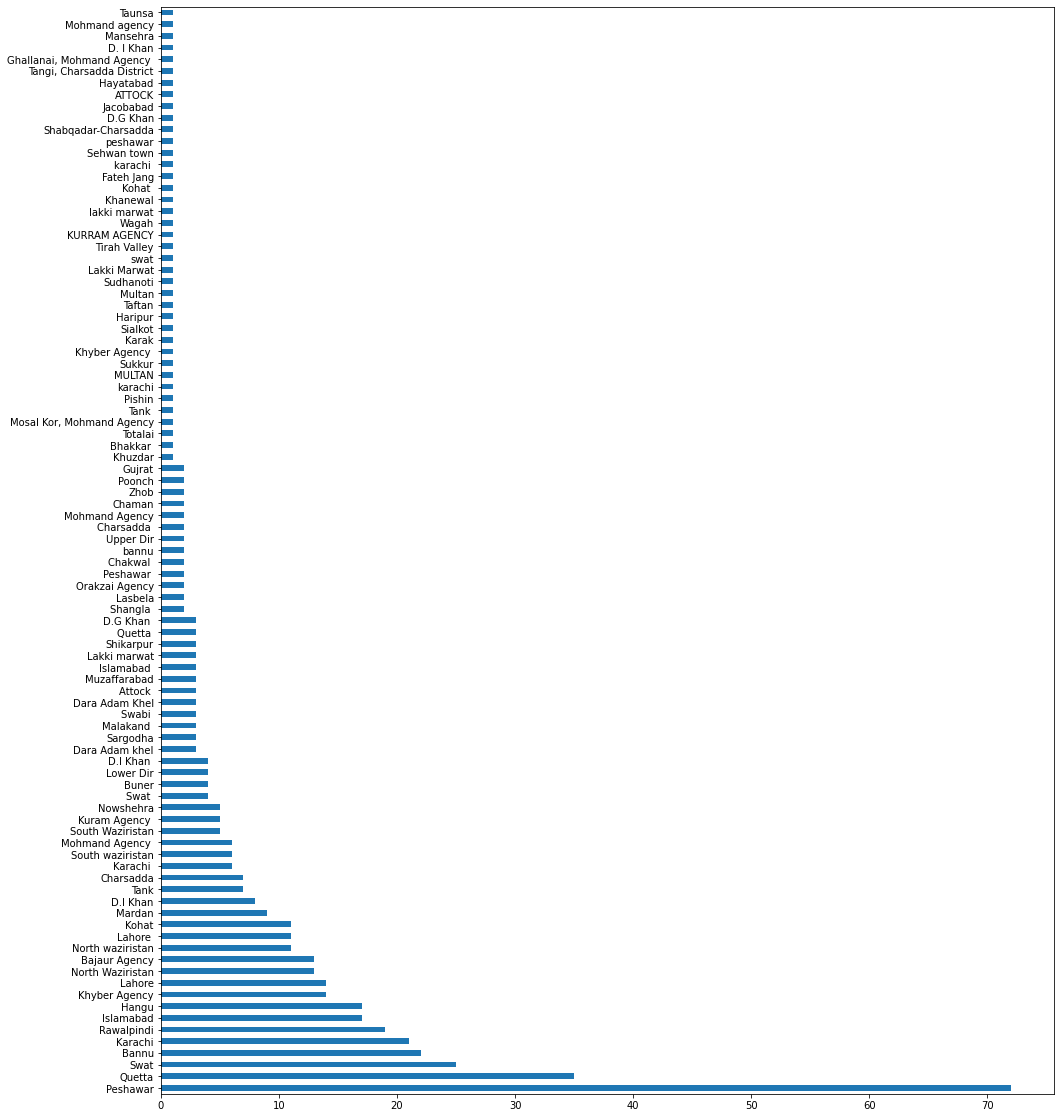

In [21]:
citiesCounts.plot(kind='barh',figsize=[16,20])

In [22]:
# convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
# remove trailing white spaces
suicide_attacks['City'] = suicide_attacks['City'].str.strip()
citiesCounts2 =  suicide_attacks['City'].value_counts()
print(citiesCounts2.sort_index())

attock            4
bajaur agency    13
bannu            24
bhakkar           1
buner             4
                 ..
tirah valley      1
totalai           1
upper dir         2
wagah             1
zhob              2
Name: City, Length: 67, dtype: int64


In [23]:
cities =  suicide_attacks['City'].unique()
matches = fw.process.extract("d.i khan", cities, limit=10, scorer=fw.fuzz.token_sort_ratio)
print(*matches, sep=',\n')

('d.i khan', 100),
('d. i khan', 100),
('d.g khan', 88),
('khanewal', 50),
('sudhanoti', 47),
('kohat', 46),
('hangu', 46),
('dara adam khel', 45),
('mardan', 43),
('pishin', 43)


In [24]:
citiesCounts =  suicide_attacks['City'].value_counts().sort_values(ascending=False);
for city, count in citiesCounts.items():
    matches = fw.process.extract(city, cities, limit=10, scorer=fw.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= 90]
    if (len(close_matches)>1):
        print (close_matches)
        # get the rows of all the close matches in our dataframe
        rows_with_matches = suicide_attacks['City'].isin(close_matches)
        suicide_attacks.loc[rows_with_matches,'City'] = city;

['d.i khan', 'd. i khan']
['kuram agency', 'kurram agency']
['d.i khan', 'd. i khan']
['kurram agency', 'kuram agency']


In [25]:
citiesCounts3 =  suicide_attacks['City'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(citiesCounts3.sort_index())
print("Number of cities: {}".format(len(citiesCounts3)))

attock                        4
bajaur agency                13
bannu                        24
bhakkar                       1
buner                         4
chakwal                       2
chaman                        2
charsadda                     9
d. i khan                    13
d.g khan                      4
dara adam khel                6
fateh jang                    1
ghallanai, mohmand agency     1
gujrat                        2
hangu                        17
haripur                       1
hayatabad                     1
islamabad                    20
jacobabad                     1
karachi                      29
karak                         1
khanewal                      1
khuzdar                       1
khyber agency                15
kohat                        12
kurram agency                 6
lahore                       25
lakki marwat                  5
lasbela                       2
lower dir                     4
malakand                      3
mansehra

In [26]:
def replace_close_matches(df, column, min_ratio=90):
    columnCounts = df[column].value_counts().sort_values(ascending=False);
    for index,count in columnCounts.items():
        matches = fw.process.extract(index, columnCounts.index, limit=10, scorer=fw.fuzz.token_sort_ratio)
        close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
        if (len(close_matches)>1):
            rows_with_matches = df[column].isin(close_matches)
            df.loc[rows_with_matches,column] = index;

In [27]:
suicide_attacks = pd.read_csv(data_file_prefix +"data/PakistanSuicideAttacks.csv", encoding='Windows-1252')
# convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
# remove trailing white spaces
suicide_attacks['City'] = suicide_attacks['City'].str.strip()
# replace any closely match values in city
replace_close_matches(suicide_attacks,'City')

In [28]:
citiesCounts3 =  suicide_attacks['City'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(citiesCounts3.sort_index())
print("Number of cities: {}".format(len(citiesCounts3)))

attock                        4
bajaur agency                13
bannu                        24
bhakkar                       1
buner                         4
chakwal                       2
chaman                        2
charsadda                     9
d. i khan                    13
d.g khan                      4
dara adam khel                6
fateh jang                    1
ghallanai, mohmand agency     1
gujrat                        2
hangu                        17
haripur                       1
hayatabad                     1
islamabad                    20
jacobabad                     1
karachi                      29
karak                         1
khanewal                      1
khuzdar                       1
khyber agency                15
kohat                        12
kurram agency                 6
lahore                       25
lakki marwat                  5
lasbela                       2
lower dir                     4
malakand                      3
mansehra

In [29]:
# write the cleansed data to a file
suicide_attacks.to_csv("PakistanSuicideAttacks_citesCleaned.csv")

In [30]:
suicide_attacks

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,islamabad,33.718000,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,karachi,24.991800,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,karachi,24.991800,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,karachi,24.991800,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,quetta,30.209500,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,492,Thursday-October-05-2017,13 MuHarram 1439 A.H,Working Day,NaN,NaN,quetta,28.571051,67.496895,Balochistan,...,None,21.0,22.0,25.0,NaN,1.0,NaN,"Larkana Hospital, Gandawah District Headquarte...",27.800,81.000
492,493,Thursday-October-19-2017,27 MuHarram 1439 A.H,Working Day,NaN,8:00 AM,quetta,NaN,NaN,Balochistan,...,None,7.0,7.0,22.0,22,1.0,NaN,NaN,26.000,79.000
493,494,Thursday-November-9-2017,19 Safar 1439 A.H,Working Day,NaN,7:00 AM,quetta,30.221057,67.002524,Balochistan,...,None,2.0,2.0,8.0,8,1.0,15KG,"Combined Military Hospital (CMH)-(Quetta), Civ...",25.000,77.000
494,495,Friday-November-24-2017,5 Rabi Al-Awwal 1439 A.H,Working Day,NaN,7:00 AM,peshawar,33.970623,71.43862,KPK,...,None,1.0,3.0,6.0,8,1.0,20KG,Hayatabad Medical Complex(Peshawar),22.000,72.000


In [31]:
provinceCounts =  suicide_attacks['Province'].value_counts()
print(provinceCounts.sort_index())
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()
# remove trailing white spaces
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()
provinceCounts =  suicide_attacks['Province'].value_counts()
print(provinceCounts.sort_index())
replace_close_matches(suicide_attacks,'Province')
provinceCounts =  suicide_attacks['Province'].value_counts()
print(provinceCounts.sort_index())

AJK              6
Balochistan     16
Baluchistan     31
Capital         20
FATA            70
Fata             3
KPK            251
Punjab          64
Sindh           35
Name: Province, dtype: int64
ajk              6
balochistan     16
baluchistan     31
capital         20
fata            73
kpk            251
punjab          64
sindh           35
Name: Province, dtype: int64
ajk              6
balochistan     47
capital         20
fata            73
kpk            251
punjab          64
sindh           35
Name: Province, dtype: int64


https://en.wikipedia.org/wiki/Administrative_units_of_Pakistan

In [32]:
suicide_attacks['Date'].describe()

count                       496
unique                      455
top       Wednesday-Feb-15-2017
freq                          3
Name: Date, dtype: object

In [33]:
suicide_attacks['Date'] =suicide_attacks['Date'].apply(lambda x: x[x.find('-')+1:].replace('-',' ').replace(',',' '))
suicide_attacks['Date']

0      November 19 1995
1       November 6 2000
2            May 8 2002
3          June 14 2002
4           July 4 2003
             ...       
491     October 05 2017
492     October 19 2017
493     November 9 2017
494    November 24 2017
495    November 25 2017
Name: Date, Length: 496, dtype: object

In [34]:
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Jan ','January ').replace('Feb ', 'February ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Mar ','March ').replace('Apr ', 'April ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Jun ','June ').replace('Jul ', 'July ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Aug ','August ').replace('Sep ', 'September ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Oct ','October ').replace('Nov ', 'November ' ) )
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: x.replace('Dec ','December ') )

suicide_attacks['Date']

0      November 19 1995
1       November 6 2000
2            May 8 2002
3          June 14 2002
4           July 4 2003
             ...       
491     October 05 2017
492     October 19 2017
493     November 9 2017
494    November 24 2017
495    November 25 2017
Name: Date, Length: 496, dtype: object

In [35]:
suicide_attacks['Date'] = suicide_attacks['Date'].apply(lambda x: datetime.strptime(x,'%B %d %Y') )

suicide_attacks['Date']

0     1995-11-19
1     2000-11-06
2     2002-05-08
3     2002-06-14
4     2003-07-04
         ...    
491   2017-10-05
492   2017-10-19
493   2017-11-09
494   2017-11-24
495   2017-11-25
Name: Date, Length: 496, dtype: datetime64[ns]

In [36]:
suicide_attacks.dtypes

S#                                  int64
Date                       datetime64[ns]
Islamic Date                       object
Blast Day Type                     object
Holiday Type                       object
Time                               object
City                               object
Latitude                          float64
Longitude                          object
Province                           object
Location                           object
Location Category                  object
Location Sensitivity               object
Open/Closed Space                  object
Influencing Event/Event            object
Target Type                        object
Targeted Sect if any               object
Killed Min                        float64
Killed Max                        float64
Injured Min                       float64
Injured Max                        object
No. of Suicide Blasts             float64
Explosive Weight (max)             object
Hospital Names                    